## Filter for Duplicates

In [3]:
# Imports
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [1]:
def getQuery(query, columns):
    conn = sqlite3.connect("joke2.db")
    cur = conn.cursor()
    cur.execute(query) 
    rows = pd.DataFrame(cur.fetchall(), columns=columns, )
    conn.close()
    return(rows)

In [3]:
tmp = getQuery("SELECT title, body, COUNT(*) FROM jokes GROUP BY title, body HAVING COUNT(*) > 1",
              columns=["Title","Body","Reposted Amount"])

In [4]:
reposted = tmp.sort_values(axis=0, by=["Reposted Amount"], ascending=False)
reposted.head(15)

Title  \
11678                                                  V   
17008                Why did the chicken cross the road?   
3665                                        Donald Trump   
8912                                             My life   
319                                              504,323   
1                                                          
6078     I found a place where the recycling rate is 98%   
13693  What do you get when you cross a joke with a r...   
8050                                         Knock knock   
17019                Why did the chicken cross the road?   
17017                Why did the chicken cross the road?   
6089     I found a place where the recycling rate is 99%   
8033                                         Knock Knock   
17975                             Why was 6 afraid of 7?   
11754                                 Wanna hear a joke?   

                            Body  Reposted Amount  
11678                       None              401  
17008                       None              301  
3665                        None              235  
8912                        None              220  
319                         None              215  
1                           None              187  
6078                        None              179  
13693                       None              163  
8050                        None              155  
17019                  [deleted]              109  
17017  To get to the other side.               99  
6089                        None               87  
8033                        None               86  
17975                       None               83  
11754                       None               83

In [5]:
tab = pd.DataFrame(columns=["Filt","Records"])
for filt in [1,2,5,10]+list(range(20,420,10)):
    tab = tab.append({"Filt" : filt, "Records" : sum(reposted["Reposted Amount"] > filt)}, ignore_index=True)
tab.head()

Filt Records
0    1   18682
1    2    5919
2    5    1389
3   10     429
4   20     140

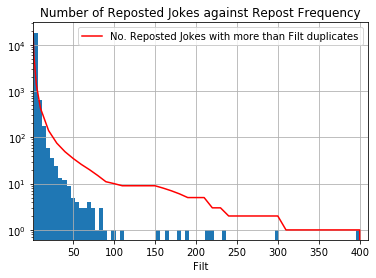

In [6]:
p1 = tab.plot(x="Filt",y="Records", color="red", label="No. Reposted Jokes with more than Filt duplicates").set_yscale("log")
p2 = reposted["Reposted Amount"].hist(bins=80).set_yscale("log")
p3 = plt.title("Number of Reposted Jokes against Repost Frequency")

If we do this based on Title Or Body, we see slightly more

In [7]:
reposted_titles = getQuery("SELECT title, COUNT(*) FROM jokes GROUP BY title HAVING COUNT(*) > 1",
                  columns=["Title","Reposted Amount"])
reposted_body = getQuery("SELECT body, COUNT(*) FROM jokes GROUP BY body HAVING COUNT(*) > 1",
                  columns=["Body","Reposted Amount"])

In [8]:
reposted_titles.sort_values(axis=0, by=["Reposted Amount"], ascending=False).head(10)

Title  Reposted Amount
34256  Why did the chicken cross the road?             1131
24775                                    V              589
16856                          Knock knock              540
3248             A man walks into a bar...              420
3191                A man walks into a bar              415
16837                          Knock Knock              364
35950               Why was 6 afraid of 7?              314
7910                          Donald Trump              309
18615                              My life              270
30462             What's brown and sticky?              250

In [9]:
reposted_body.sort_values(axis=0, by=["Reposted Amount"], ascending=False).head(10)

Body  Reposted Amount
17113                       None           146424
26341                  [deleted]            76267
23818  To get to the other side.              192
3510                    A stick.              138
8640                     Dr. Dre              138
26357                \[removed\]              135
22261            The wheelchair.              110
17146                      None.              105
22259             The wheelchair              103
3507                     A stick               98

In [10]:
# Longer punchlines...?
reposted_body[reposted_body["Body"].str.len() > 100].sort_values(axis=0, by=["Reposted Amount"], ascending=False).head(10)

Body  Reposted Amount
8488   Doctor: "I'm sorry but you suffer from a termi...               49
3944   A: I have the perfect son. B: Does he smoke? A...               48
2386   A husband and wife are trying to set up a new ...               47
1777   A child asked his father, "How were people bor...               46
2592   A man asks a farmer near a field, Sorry sir, w...               45
10476  He loved his job. Driving a train had been his...               43
3578   A teacher is teaching a class and she sees tha...               37
10701  He speaks with the officer, who assigns him hi...               36
17605  On the way there, he tells his driver that loo...               35
18917  Reporter: "Excuse me, may I interview you?" Ma...               33

In [11]:
reposted_body["Length"] = reposted_body["Body"].str.len()

In [12]:
reposted_body.head(5)

Body  Reposted Amount  Length
0                                                                  84       0
1  " Hey grandpa, what would you do with hot and ...                2     164
2                                  "...It's Satrap."                2      17
3             "...We're a non-prophet organization."                2      38
4           "...but you can't count Missouri twice."                2      40

Add jitter

In [13]:
reposted_body["jitter"] = np.random.normal(1, 0.5, len(reposted_body["Body"]))

In [14]:
reposted_body.head(5)

Body  Reposted Amount  Length  \
0                                                                  84       0   
1  " Hey grandpa, what would you do with hot and ...                2     164   
2                                  "...It's Satrap."                2      17   
3             "...We're a non-prophet organization."                2      38   
4           "...but you can't count Missouri twice."                2      40   

     jitter  
0  1.615779  
1  0.839869  
2  1.096211  
3  0.605941  
4  1.616595

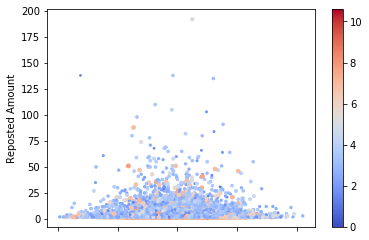

In [15]:
tmp=reposted_body
tmp=reposted_body[reposted_body["Reposted Amount"] < 4e4]
tmp.sort_values("Length", ascending=False).plot(
    kind="scatter", x="jitter", y="Reposted Amount", 
    c=np.log(tmp["Length"]+1), 
    cmap=plt.cm.get_cmap('coolwarm'), 
    s=np.log(tmp["Length"]+1)*2)
#plt.scale("log")
#plt.xscale("log")
#plt.yscale("log")
#reposted_body["Reposted Amount"].values.sort()

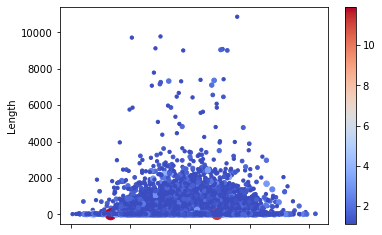

In [16]:
tmp=reposted_body
tmp=reposted_body[reposted_body["Length"] < 2e4]
#tmp=reposted_body[reposted_body["Reposted Amount"] < 100][reposted_body["Reposted Amount"] > 5]
tmp.plot(
    kind="scatter", x="jitter", y="Length",
    c=np.log(tmp["Reposted Amount"]+1),
    cmap=plt.cm.get_cmap('coolwarm'),
    s=np.log(tmp["Reposted Amount"]+1)*10)
#plt.scale("log")
#plt.xscale("log")
#plt.yscale("log")
#reposted_body["Reposted Amount"].values.sort()

# Issues: Jokes Variants 
The graphic above assumes the title AND body are unique. But as can be glimpsed below, many of the jokes have the same title but the punchline is written elsewhere:

In [17]:
reposted[reposted["Title"]=="Why did the chicken cross the road?"]

Title  \
17008  Why did the chicken cross the road?   
17019  Why did the chicken cross the road?   
17017  Why did the chicken cross the road?   
17015  Why did the chicken cross the road?   
17016  Why did the chicken cross the road?   
17020  Why did the chicken cross the road?   
17005  Why did the chicken cross the road?   
17006  Why did the chicken cross the road?   
17007  Why did the chicken cross the road?   
17009  Why did the chicken cross the road?   
17010  Why did the chicken cross the road?   
17011  Why did the chicken cross the road?   
17012  Why did the chicken cross the road?   
17013  Why did the chicken cross the road?   
17014  Why did the chicken cross the road?   
17018  Why did the chicken cross the road?   

                                                    Body  Reposted Amount  
17008                                               None              301  
17019                                          [deleted]              109  
17017                          To get to the other side.               99  
17015                           To get to the other side               33  
17016                          To get to the other side!               30  
17020                           to get to the other side                6  
17005  Because North Korea's missiles can't reach tha...                3  
17006                              Because it wanted to.                2  
17007                                         It didn't.                2  
17009  The answer is trivial and is left as an exerci...                2  
17010  The chicken clucked silently to himself as he ...                2  
17011                           To check out the chicks.                2  
17012        To escape North Korea's long range missiles                2  
17013                                 To get roadkilled.                2  
17014  To get to the idiot's house. Knock knock. Who'...                2  
17018                                        Weed eater.                2

But this also only gives half the picture, because many of titles are variants of one another:

In [18]:
reposted_titles[reposted_titles["Title"].str.contains("98%")]

Title  Reposted Amount
12670      I found a place where the recycle rate is 98%                5
12675    I found a place where the recycling rate is 98%              205
12676   I found a place where the recycling rate is 98%!                3
12677   I found a place where the recycling rate is 98%.               12
12678  I found a place where the recycling rate is 98...                5
12689   I found a place where the recycling rates is 98%                2
12690          I found a place with a 98% recycling rate                5
13372       I know a place where the recycle rate is 98%                2
13373     I know a place where the recycling rate is 98%                5
15433  I've discovered a place with a 98% recycling rate                2

## What shall we do?

Let's do some pre-processing on the database:
 * Shift everything to lowercase
 * remove punctuation except space

In [19]:
import string
tmp = reposted_titles[reposted_titles["Title"].str.contains("98%")]["Title"].values

In [20]:
wanted_chars = string.ascii_letters + string.digits + ' '

def convertToNice(tmp):
    return(
        list(map(lambda joke: "".join([
            char.lower() for char in joke if char in wanted_chars]), tmp
    )))

convertToNice(tmp)

['i found a place where the recycle rate is 98',
 'i found a place where the recycling rate is 98',
 'i found a place where the recycling rate is 98',
 'i found a place where the recycling rate is 98',
 'i found a place where the recycling rate is 98',
 'i found a place where the recycling rates is 98',
 'i found a place with a 98 recycling rate',
 'i know a place where the recycle rate is 98',
 'i know a place where the recycling rate is 98',
 'ive discovered a place with a 98 recycling rate']

In [21]:
def getTitleBody():
    conn = sqlite3.connect("joke2.db")
    cur = conn.cursor()
    cur.execute("SELECT id, title, body FROM jokes;")
    rows = pd.DataFrame(cur.fetchall(), columns=["id", "Title","Body"], )
    conn.close()
    return(rows)

In [22]:
asd = getTitleBody()

In [23]:
asd.head(10)

id                                              Title  \
0  6ayvz                              At the Welfare Office   
1  6br47                                         Kid Wisdom   
2  6abno                            Mississippi Grandmother   
3  6dmyj                                         Amish Joke   
4  6egb4  Q: Did you hear about the bulimic bachelor par...   
5  6ehzq        Poor Man's Guide to Understanding Terrorism   
6  6ek4j  Q: What is the difference between a bartender ...   
7  6ess9  Q: Why did the baker have brown hands? A: Beca...   
8  6jv4y  does anyone think the reason John McCain is in...   
9  6ngpy  What did the mathematician wear in the beauty ...   

                                                Body  
0                                          [deleted]  
1                                          [deleted]  
2                                               None  
3  Question: What goes "Clop clop clop clop" &lt;...  
4                                               None  
5                                               None  
6                                               None  
7                                               None  
8                                               None  
9                            Fibonacci sequins!!!!!!

In [24]:
asd["l_title"] = convertToNice(asd["Title"])
asd["l_body"] = convertToNice(asd["Body"])

In [25]:
asd.head(10)

id                                              Title  \
0  6ayvz                              At the Welfare Office   
1  6br47                                         Kid Wisdom   
2  6abno                            Mississippi Grandmother   
3  6dmyj                                         Amish Joke   
4  6egb4  Q: Did you hear about the bulimic bachelor par...   
5  6ehzq        Poor Man's Guide to Understanding Terrorism   
6  6ek4j  Q: What is the difference between a bartender ...   
7  6ess9  Q: Why did the baker have brown hands? A: Beca...   
8  6jv4y  does anyone think the reason John McCain is in...   
9  6ngpy  What did the mathematician wear in the beauty ...   

                                                Body  \
0                                          [deleted]   
1                                          [deleted]   
2                                               None   
3  Question: What goes "Clop clop clop clop" &lt;...   
4                                               None   
5                                               None   
6                                               None   
7                                               None   
8                                               None   
9                            Fibonacci sequins!!!!!!   

                                             l_title  \
0                              at the welfare office   
1                                         kid wisdom   
2                            mississippi grandmother   
3                                         amish joke   
4  q did you hear about the bulimic bachelor part...   
5         poor mans guide to understanding terrorism   
6  q what is the difference between a bartender a...   
7  q why did the baker have brown hands a because...   
8  does anyone think the reason john mccain is in...   
9  what did the mathematician wear in the beauty ...   

                                              l_body  
0                                            deleted  
1                                            deleted  
2                                               none  
3  question what goes clop clop clop clop ltinser...  
4                                               none  
5                                               none  
6                                               none  
7                                               none  
8                                               none  
9                                  fibonacci sequins

In [167]:
#my_data = ({id=1, value='foo'}, {id=2, value='bar'})
#cursor.executemany('UPDATE test SET myCol=:value WHERE rowId=:id', my_data)


In [28]:
t_b_i = ((x["l_title"], x["l_body"], x["id"]) for index, x in asd.iterrows())

In [27]:
lim=0
for x in t_b_i:
    if lim==3:
        break
    lim += 1
    print(x)

('at the welfare office', 'deleted', '6ayvz')
('kid wisdom', 'deleted', '6br47')
('mississippi grandmother', 'none', '6abno')


In [159]:
conn = sqlite3.connect("joke2.db")
cur = conn.cursor()
cur.execute("ALTER TABLE jokes ADD COLUMN 'nice_title' text;")
cur.execute("ALTER TABLE jokes ADD COLUMN 'nice_body' text;")
conn.commit()
conn.close()

In [29]:
def updateTitleBody(title_body_id):
    conn = sqlite3.connect("joke2.db")
    cur = conn.cursor()
    cur.executemany('UPDATE jokes SET nice_title=?, nice_body=? WHERE id=?', title_body_id)
    conn.commit()
    conn.close()
    
updateTitleBody(t_b_i)

# Repeat Analysis of duplicates

In [31]:
tmp = getQuery("SELECT title, body, nice_title, nice_body from jokes LIMIT 5;",
              columns=["Title","Body","ntitle", "nbody"])

In [32]:
tmp

Title  \
0                              At the Welfare Office   
1                                         Kid Wisdom   
2                            Mississippi Grandmother   
3                                         Amish Joke   
4  Q: Did you hear about the bulimic bachelor par...   

                                                Body  \
0                                          [deleted]   
1                                          [deleted]   
2                                               None   
3  Question: What goes "Clop clop clop clop" &lt;...   
4                                               None   

                                              ntitle  \
0                              at the welfare office   
1                                         kid wisdom   
2                            mississippi grandmother   
3                                         amish joke   
4  q did you hear about the bulimic bachelor part...   

                                               nbody  
0                                            deleted  
1                                            deleted  
2                                               none  
3  question what goes clop clop clop clop ltinser...  
4                                               none

In [134]:
tmp = getQuery("SELECT nice_title, nice_body, COUNT(*) FROM jokes GROUP BY nice_title, nice_body HAVING COUNT(*) > 1",
    columns=["Title","Body","Reposted Amount"])

In [135]:
len(tmp)

26673

Significantly less unique posts!

In [9]:
tmp.sort_values(by="Reposted Amount", ascending=False).head(10)

Title  \
17199                                               v   
11625                                     knock knock   
24596              why did the chicken cross the road   
12934                                         my life   
5                                                       
5009                                     donald trump   
240                                            504323   
8455   i found a place where the recycling rate is 98   
24606              why did the chicken cross the road   
1797                           a man walks into a bar   

                           Body  Reposted Amount  
17199                      none              474  
11625                      none              392  
24596                      none              368  
12934                      none              368  
5                          none              320  
5009                       none              287  
240                        none              240  
8455                       none              198  
24606  to get to the other side              189  
1797                       none              181

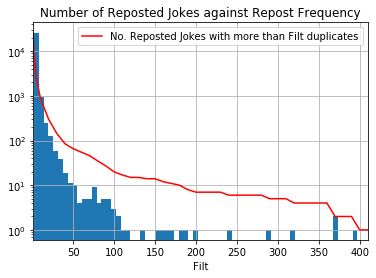

In [10]:
tab = pd.DataFrame(columns=["Filt","Records"])
for filt in [1,2,5,10]+list(range(20,420,10)):
    tab = tab.append({"Filt" : filt, "Records" : sum(tmp["Reposted Amount"] > filt)}, ignore_index=True)
tab.head()
p1 = tab.plot(x="Filt",y="Records", color="red", label="No. Reposted Jokes with more than Filt duplicates").set_yscale("log")
p2 = tmp["Reposted Amount"].hist(bins=80).set_yscale("log")
p3 = plt.title("Number of Reposted Jokes against Repost Frequency")

More jokes that have been reposted 50-100 times, than before

In [13]:
tmp["Length"] = tmp["Body"].str.len() + tmp["Title"].str.len()
tmp["Jitter"] = np.random.normal(1, 0.5, len(tmp["Length"]))

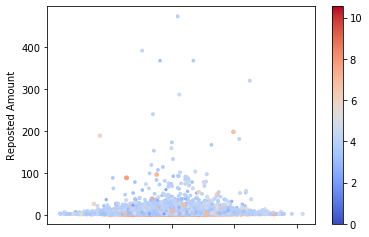

In [17]:
tmp.sort_values("Length", ascending=False).plot(
    kind="scatter", x="Jitter", y="Reposted Amount", 
    c=np.log(tmp["Length"]+1), 
    cmap=plt.cm.get_cmap('coolwarm'), 
    s=np.log(tmp["Length"]+1)*2)
#plt.scale("log")
#plt.xscale("log")
#plt.yscale("log")

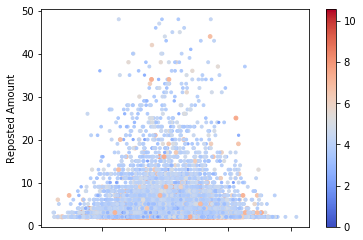

In [21]:
amp = tmp[tmp["Reposted Amount"] < 50]
amp.sort_values("Length", ascending=False).plot(
    kind="scatter", x="Jitter", y="Reposted Amount", 
    c=np.log(amp["Length"]+1), 
    cmap=plt.cm.get_cmap('coolwarm'), 
    s=np.log(amp["Length"]+1)*2)


In [139]:
# Attempt to get the IDs for all the unique (title,body) tuples
tmp2 = getQuery("SELECT id, ups, downs, comments, nice_title, nice_body FROM jokes WHERE nice_title AND nice_body IN (SELECT nice_title, nice_body, COUNT(*) FROM jokes GROUP BY nice_title, nice_body HAVING COUNT(*) > 1);",
    columns=["ID", "ups", "downs", "comments", "Title","Body"])

OperationalError: sub-select returns 3 columns - expected 1

In [140]:
tmp11 = getQuery("SELECT id FROM jokes GROUP BY nice_title, nice_body HAVING COUNT(*) > 1",
    columns=["Title","Body","Reposted Amount"])

In [141]:
len(tmp11)

26673